In [21]:
# Step 1: Upload the file
from google.colab import files
uploaded = files.upload()

# Step 2: Load the data into a DataFrame
import pandas as pd

# Assuming the uploaded file is 'Diabetes.csv'
df = pd.read_csv('Diabetes.csv')
df.head()


Saving Diabetes.csv to Diabetes (2).csv


,Unnamed: 0,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and target variable
X = df_filled.drop(columns=['Diabetes_binary'])  # Features
y = df_filled['Diabetes_binary']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


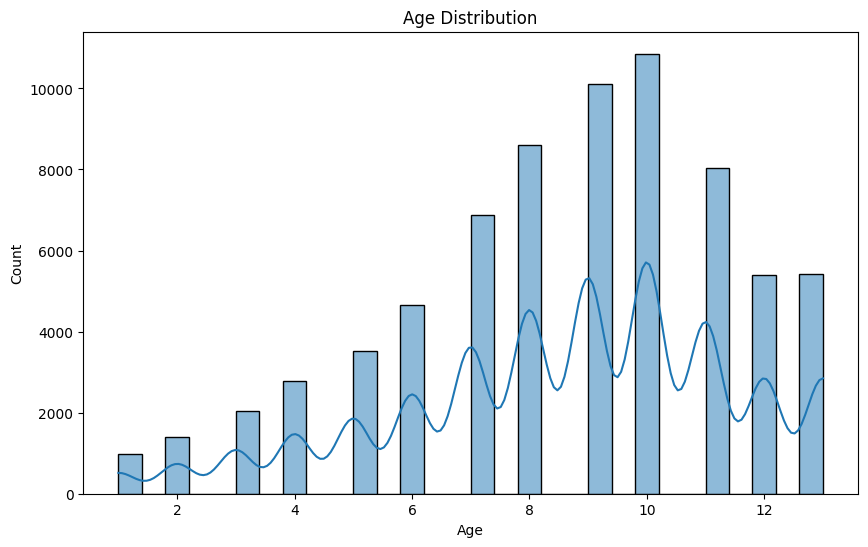

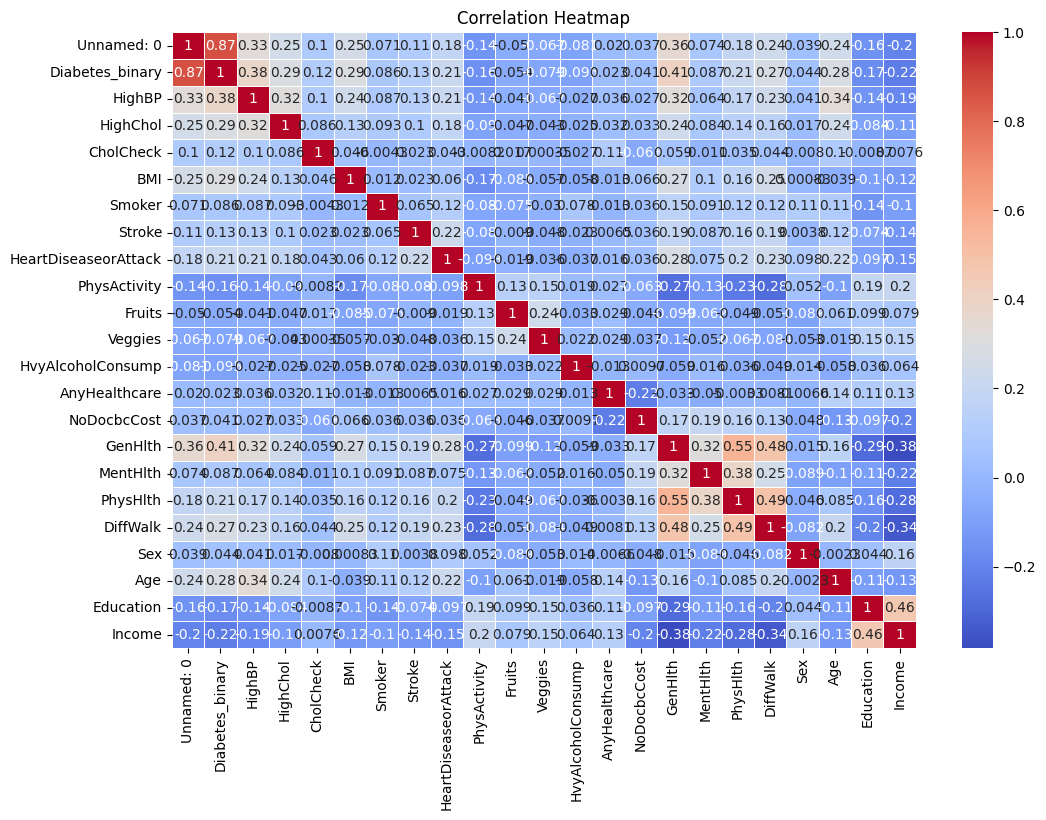

In [26]:
# Example: Distribution plot for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Example: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [24]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7090
         1.0       1.00      1.00      1.00      7049

    accuracy                           1.00     14139
   macro avg       1.00      1.00      1.00     14139
weighted avg       1.00      1.00      1.00     14139

[[7090    0]
 [   1 7048]]


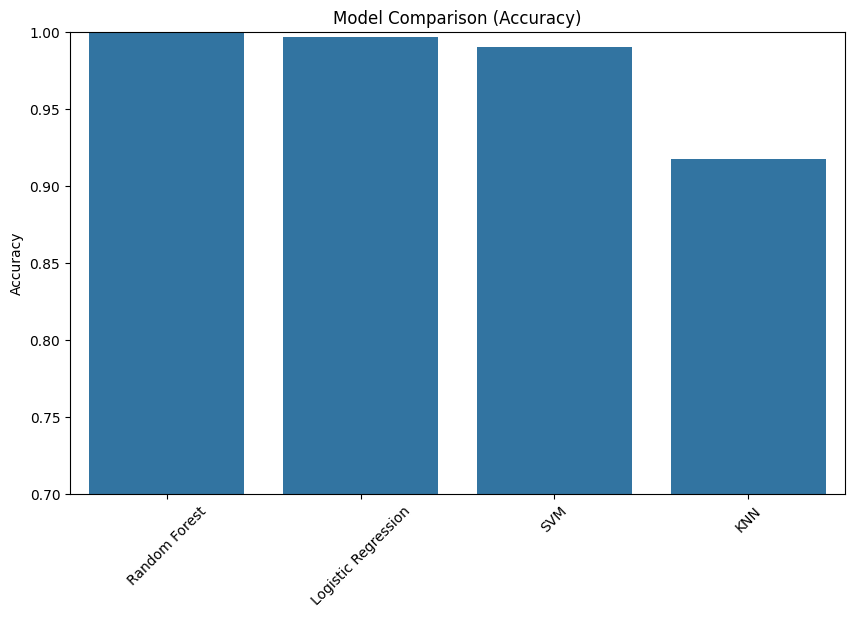

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Compare accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0.7, 1.0)
plt.title('Model Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

%matplotlib inline

In [29]:
# Load the dataset
url = "https://raw.githubusercontent.com/kuchbhi-kunal/nidan/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df = pd.read_csv(url)

# Explore the dataset
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


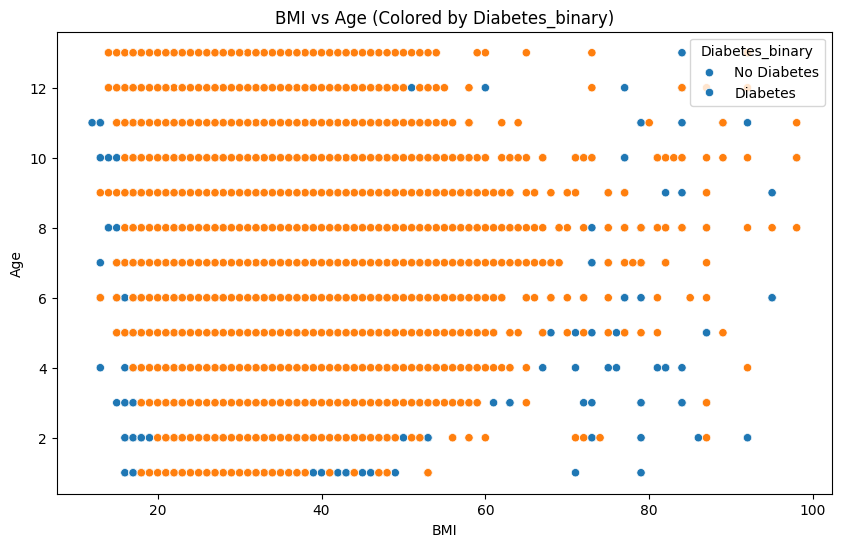

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Age', data=df, hue='Diabetes_binary')
plt.title('BMI vs Age (Colored by Diabetes_binary)')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend(title='Diabetes_binary', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()


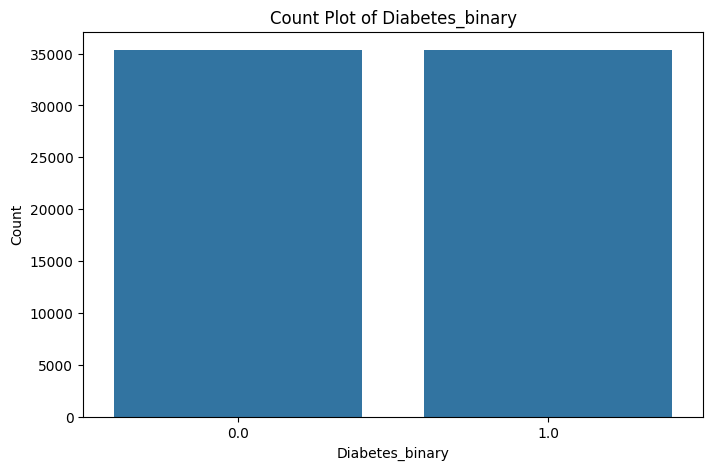

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Count Plot of Diabetes_binary')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.show()


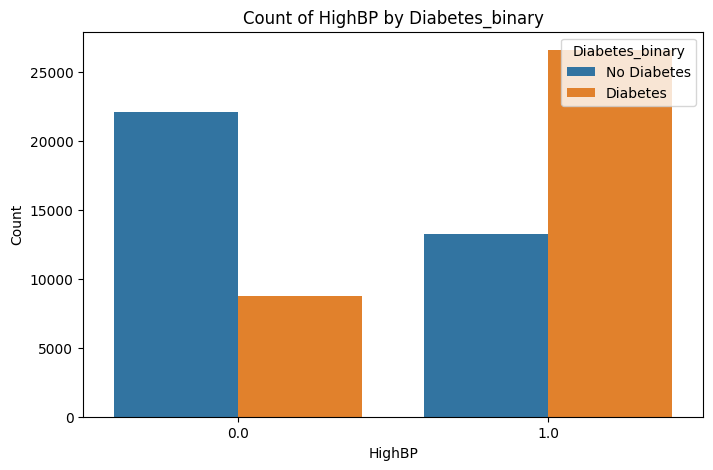

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='HighBP', hue='Diabetes_binary', data=df)
plt.title('Count of HighBP by Diabetes_binary')
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.legend(title='Diabetes_binary', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()


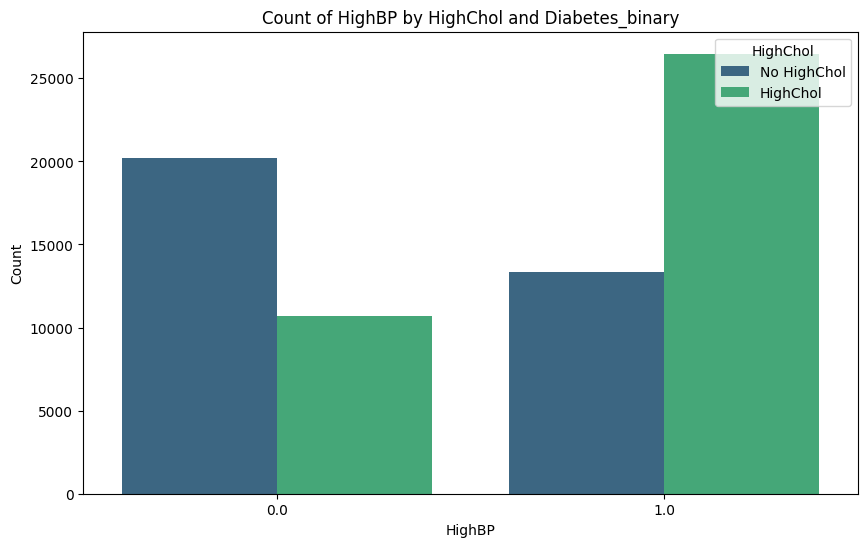

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HighBP', hue='HighChol', data=df, palette='viridis')
plt.title('Count of HighBP by HighChol and Diabetes_binary')
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.legend(title='HighChol', loc='upper right', labels=['No HighChol', 'HighChol'])
plt.show()


In [35]:
# Summary statistics for numeric columns
numeric_summary = df.describe()
print(numeric_summary)

# Summary statistics for categorical columns
categorical_summary = df.describe(include=['object'])
print(categorical_summary)


       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000   

ValueError: No objects to concatenate

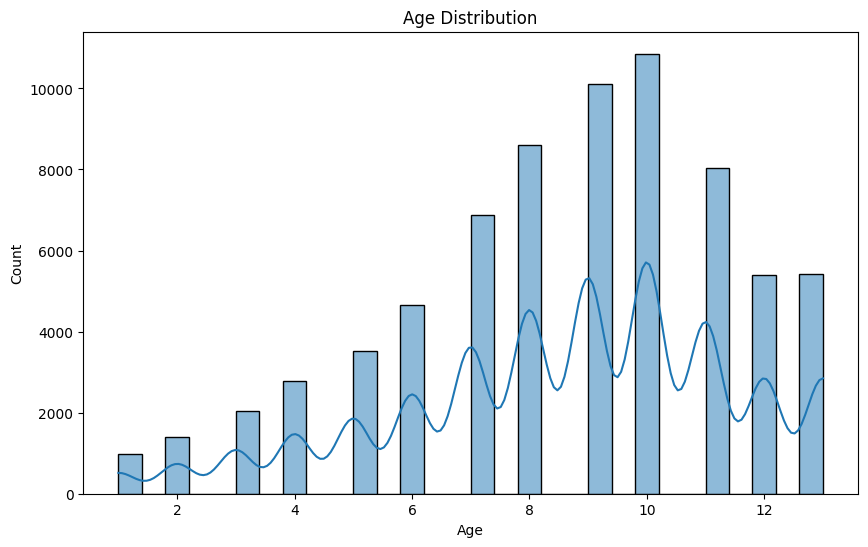

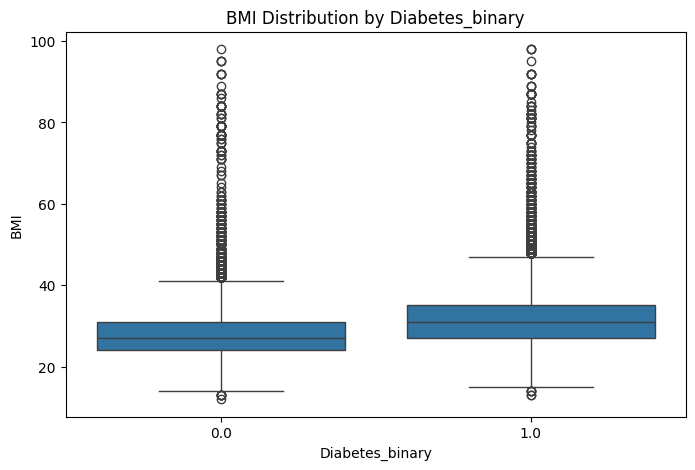

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution plot for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Example: Boxplot for BMI
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes_binary')
plt.xlabel('Diabetes_binary')
plt.ylabel('BMI')
plt.show()


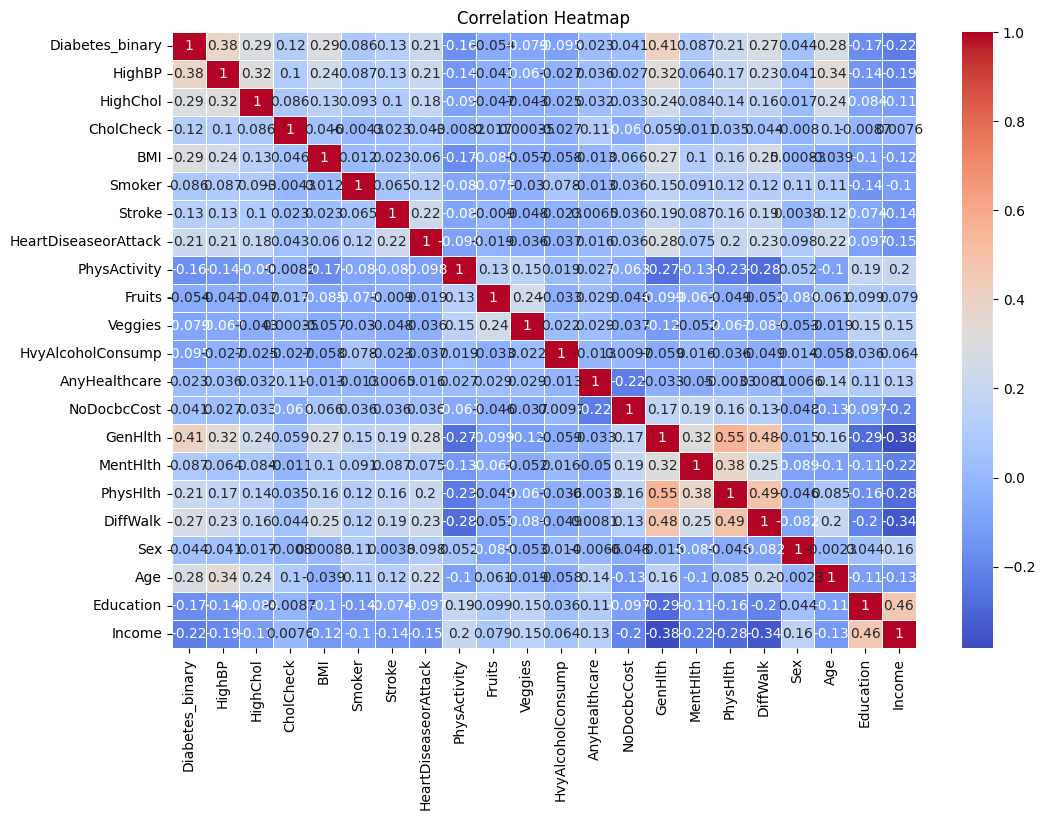

In [37]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [38]:
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Ensure all NaNs are handled
print(df_filled.isnull().sum())


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [39]:
# Define features (X) and target variable (y)
X = df[['BMI', 'HighBP']]
y = df['Diabetes_binary']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a logistic regression model (you can try other algorithms too)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [41]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6927646934012306
Confusion Matrix:
[[4488 2602]
 [1742 5307]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.63      0.67      7090
         1.0       0.67      0.75      0.71      7049

    accuracy                           0.69     14139
   macro avg       0.70      0.69      0.69     14139
weighted avg       0.70      0.69      0.69     14139



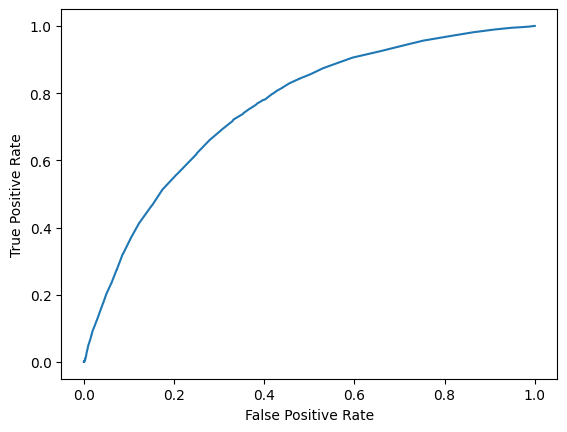

In [42]:
from sklearn import metrics


y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 69.28%


In [44]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[4488 2602]
 [1742 5307]]


In [45]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[4488 2602]
 [1742 5307]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.63      0.67      7090
         1.0       0.67      0.75      0.71      7049

    accuracy                           0.69     14139
   macro avg       0.70      0.69      0.69     14139
weighted avg       0.70      0.69      0.69     14139



In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_rpred = rf.predict(X_test)


y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [48]:
y_rpred

array([0., 0., 1., ..., 0., 0., 0.])

In [49]:
y_test


44967    1.0
20220    0.0
23944    0.0
2707     0.0
42356    1.0
        ... 
59313    1.0
44805    1.0
30661    0.0
30295    0.0
30199    0.0
Name: Diabetes_binary, Length: 14139, dtype: float64

In [52]:
name='Random Forest'
accuracy = accuracy_score(y_test, y_rpred)
precision = precision_score(y_test, y_rpred)
recall = recall_score(y_test, y_rpred)
f1 = f1_score(y_test, y_rpred)
roc_auc = roc_auc_score(y_test, y_rpred)

# Print results
print(f'Classifier: {name}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('\n')

name='Logistic Regressor'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print results
print(f'Classifier: {name}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('\n')

Classifier: Random Forest
Accuracy: 0.6935
Precision: 0.6802
Recall: 0.7272
F1 Score: 0.7029
ROC AUC Score: 0.6936


Classifier: Logistic Regressor
Accuracy: 0.6928
Precision: 0.6710
Recall: 0.7529
F1 Score: 0.7096
ROC AUC Score: 0.6929


